#IMPORTING THE NECESSARY LIBRARIES


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#LOADING THE FILE

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

filetrain = pd.read_csv('/content/gdrive/My Drive/hackathon/Train (1).csv')
filesub = pd.read_csv('/content/gdrive/My Drive/hackathon/SampleSubmission (2).csv')
filetest = pd.read_csv('/content/gdrive/My Drive/hackathon/Test (1).csv')

Mounted at /content/gdrive


In [466]:
ttrain = filetrain.copy()
ttest = filetest.copy()

#SOME FUNCTIONS FOR CLEANINESS

In [467]:
def getdatetime(data,x):
  u = pd.to_datetime(data[x])
  data[x +'_year'] = u.dt.year.values
  data[x + '_month'] = u.dt.month.values
  data[x +'_day'] = u.dt.day.values
  data[x +'_weekday'] = u.dt.weekday.values

  data = data.drop([x],1)
  return data


In [468]:
ttrain = getdatetime(ttrain,'Policy Start Date')
ttrain = getdatetime(ttrain,'Policy End Date')
ttrain = getdatetime(ttrain,'First Transaction Date')

ttest = getdatetime(ttest,'Policy Start Date')
ttest = getdatetime(ttest,'Policy End Date')
ttest = getdatetime(ttest,'First Transaction Date')

#HANDLING OUTLIERS IN AGE

i noticed that some ages were too far away like someone have the age og 300+ so i had to deal with it

In [469]:
def handleage(data):
  for i in range(len(data.Age.values)):
    if data.Age.values[i] <18 or data.Age.values[i]>80:
      data.Age.values[i] = np.mean(data.Age.values)

In [470]:
handleage(ttrain)
handleage(ttest)

In [471]:
ttrain.describe()

,Age,No_Pol,target,Policy Start Date_year,Policy Start Date_month,Policy Start Date_day,Policy Start Date_weekday,Policy End Date_year,Policy End Date_month,Policy End Date_day,Policy End Date_weekday,First Transaction Date_year,First Transaction Date_month,First Transaction Date_day,First Transaction Date_weekday
count,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000
mean,42.599305,1.307227,0.120457,2009.995612,6.379005,16.180727,3.456660,2010.996026,5.870354,16.055717,3.431410,2009.995612,6.379005,16.180727,3.456660
std,10.803260,0.733085,0.325509,0.161435,3.502382,8.893477,2.121946,0.516799,3.502004,8.980796,2.087325,0.161435,3.502382,8.893477,2.121946
min,18.000000,1.000000,0.000000,2001.000000,1.000000,1.000000,0.000000,2010.000000,1.000000,1.000000,0.000000,2001.000000,1.000000,1.000000,0.000000
25%,36.000000,1.000000,0.000000,2010.000000,3.000000,8.000000,2.000000,2011.000000,3.000000,8.000000,2.000000,2010.000000,3.000000,8.000000,2.000000
50%,42.000000,1.000000,0.000000,2010.000000,6.000000,16.000000,4.000000,2011.000000,5.000000,16.000000,4.000000,2010.000000,6.000000,16.000000,4.000000
75%,48.000000,1.000000,0.000000,2010.000000,9.000000,24.000000,5.000000,2011.000000,9.000000,24.000000,5.000000,2010.000000,9.000000,24.000000,5.000000
max,80.000000,10.000000,1.000000,2010.000000,12.000000,31.000000,6.000000,2041.000000,12.000000,31.000000,6.000000,2010.000000,12.000000,31.000000,6.000000


#CHECKING TARGET CLASS COUNT

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


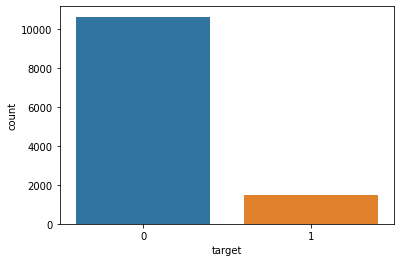

In [472]:
sns.countplot(ttrain.target)

#SOME FEATURE ENGINEERING

In [473]:
def featuredate(data):
  data['Policy Start Date_year - Policy End Date_year'] =  data['Policy End Date_year']- data['Policy Start Date_year']

In [474]:
featuredate(ttrain)
featuredate(ttest)


In [475]:
ttrain['Policy Start Date_year - Policy End Date_year'].describe()

ttrain['Policy Start Date_year - Policy End Date_year'].loc[ttrain['Policy Start Date_year - Policy End Date_year'] > 10] = np.mean(
ttrain['Policy Start Date_year - Policy End Date_year'].values)

ttest['Policy Start Date_year - Policy End Date_year'].loc[ttest['Policy Start Date_year - Policy End Date_year'] > 10] = np.mean(
ttest['Policy Start Date_year - Policy End Date_year'].values)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [476]:
ttrain['Policy Start Date_year - Policy End Date_year'].describe()

count    12079.000000
mean         0.990562
std          0.208870
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         10.000000
Name: Policy Start Date_year - Policy End Date_year, dtype: float64

In [477]:
def getdatetime(data,x):
  u = pd.to_datetime(data[x])
  return u

In [478]:
fest = getdatetime(filetrain,'Policy End Date')
vfest = getdatetime(filetest,'Policy End Date')

In [479]:
second = getdatetime(filetrain,'Policy Start Date')
vsecond = getdatetime(filetest,'Policy Start Date')

In [480]:
ttrain['policy_span'] = (fest - second).dt.days
ttest['policy_span'] = (fest - second).dt.days

# TREATING OUTLIERS IN POLICY START AND END DATE

saw some years like 2041 which had to be treated

In [481]:
ttrain['policy_span'].describe()


count    12079.000000
mean       349.558076
std        214.752199
min         12.000000
25%        364.000000
50%        364.000000
75%        364.000000
max      11139.000000
Name: policy_span, dtype: float64

In [482]:
ttrain['policy_span'].loc[ttrain['policy_span'] > 5000] = np.mean(
ttrain['policy_span'].values)
ttest['policy_span'].loc[ttest['policy_span'] > 5000] = np.mean(
ttest['policy_span'].values)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [483]:
ttrain['policy_span'].describe()

count    12079.000000
mean       345.990085
std         87.518009
min         12.000000
25%        364.000000
50%        364.000000
75%        364.000000
max       3715.000000
Name: policy_span, dtype: float64

In [484]:
ttest = ttest.drop(['Policy Start Date_year','Policy Start Date_day','Policy End Date_day','Policy End Date_year','First Transaction Date_year','First Transaction Date_month','First Transaction Date_day','First Transaction Date_weekday'],1)
ttrain = ttrain.drop(['Policy Start Date_year','Policy Start Date_day','Policy End Date_day','Policy End Date_year','First Transaction Date_year','First Transaction Date_month','First Transaction Date_day','First Transaction Date_weekday'],1)

In [485]:
ttrain

,ID,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Policy Start Date_month,Policy Start Date_weekday,Policy End Date_month,Policy End Date_weekday,Policy Start Date_year - Policy End Date_year,policy_span
0,0040R73,Male,30,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0,5,4,5,4,1.0,364.0
1,0046BNK,Female,79,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1,11,0,11,0,1.0,364.0
2,005QMC3,Male,43,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0,3,6,3,6,1.0,364.0
3,0079OHW,Male,42,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0,8,5,8,5,1.0,364.0
4,00BRP63,Entity,20,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1,8,6,12,4,0.0,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,ZZA1SES,Female,30,1,NaN,Black,Range Rover,Ibeju/Lekki,Ibeju-Lekki,Car Classic,1,5,1,5,1,1.0,364.0
12075,ZZDAC3K,Female,59,1,NaN,NaN,NaN,NaN,NaN,Car Classic,0,10,6,10,6,1.0,364.0
12076,ZZIU2XC,Male,34,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0,10,6,10,5,1.0,363.0
12077,ZZRQ1NF,NaN,42,2,NaN,White,TOYOTA,Victoria Island,Lagos,CVTP,0,2,5,2,5,1.0,364.0


In [486]:
ttest

,ID,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,Policy Start Date_month,Policy Start Date_weekday,Policy End Date_month,Policy End Date_weekday,Policy Start Date_year - Policy End Date_year,policy_span
0,009D84L,NO GENDER,25,1,NaN,As Attached,Iveco,Victoria Island,Lagos,CVTP,4,5,3,6,1.0,364.0
1,01DO2EQ,NaN,43,4,NaN,As Attached,TOYOTA,Victoria Island,Lagos,Muuve,1,4,12,4,0.0,364.0
2,01QM0NU,Female,46,1,NaN,NaN,Ford,Abuja Municipal,Abuja-Municipal,Car Classic,10,5,10,5,1.0,364.0
3,024NJLZ,Male,32,1,NaN,NaN,NaN,Kosofe,Benue,Car Classic,10,3,10,3,1.0,364.0
4,02BYET3,NaN,43,4,NaN,NaN,TOYOTA,Victoria Island,Lagos,Muuve,9,3,12,4,0.0,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5172,ZYXX5AF,Male,48,1,Saloon,NaN,Honda,NaN,NaN,CarSafe,7,6,7,6,1.0,364.0
5173,ZYYOZ5L,NaN,50,1,NaN,NaN,NaN,Victoria Island,Lagos,Car Classic,12,5,12,5,1.0,30.0
5174,ZZ1GTKD,Male,42,1,NaN,NaN,NaN,NaN,NaN,CarSafe,9,4,9,4,1.0,364.0
5175,ZZDXQSI,Female,52,1,Saloon,Grey,TOYOTA,NaN,NaN,Car Classic,7,5,7,5,1.0,364.0


# plotting some graphs

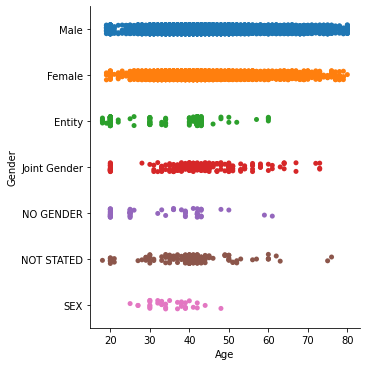

In [487]:

sns.catplot(x="Age", y="Gender", data=ttrain)

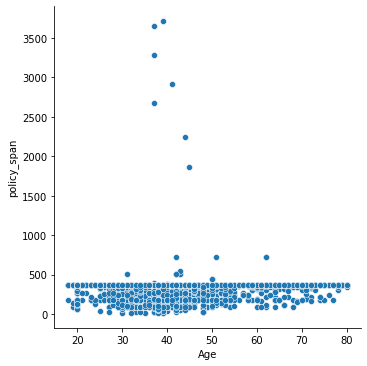

In [488]:

sns.relplot(x="Age", y="policy_span", data=ttrain);

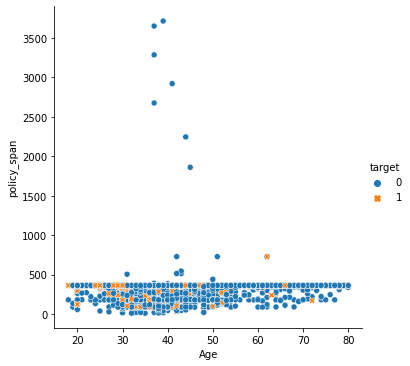

In [489]:
sns.relplot(x="Age", y="policy_span", hue="target", style="target",
            data=ttrain);

In [490]:
ttrain.describe()

,Age,No_Pol,target,Policy Start Date_month,Policy Start Date_weekday,Policy End Date_month,Policy End Date_weekday,Policy Start Date_year - Policy End Date_year,policy_span
count,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000
mean,42.599305,1.307227,0.120457,6.379005,3.456660,5.870354,3.431410,0.990562,345.990085
std,10.803260,0.733085,0.325509,3.502382,2.121946,3.502004,2.087325,0.208870,87.518009
min,18.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,12.000000
25%,36.000000,1.000000,0.000000,3.000000,2.000000,3.000000,2.000000,1.000000,364.000000
50%,42.000000,1.000000,0.000000,6.000000,4.000000,5.000000,4.000000,1.000000,364.000000
75%,48.000000,1.000000,0.000000,9.000000,5.000000,9.000000,5.000000,1.000000,364.000000
max,80.000000,10.000000,1.000000,12.000000,6.000000,12.000000,6.000000,10.000000,3715.000000


#filling null values

In [491]:
def fill(data):
  newgender = data["Gender"].fillna('Male')
  data['Gender'] = newgender
  newcar = data['Car_Category'].fillna(value = 'Saloon')
  data['Car_Category'] = newcar
  newsub = data['Subject_Car_Colour'].fillna(value = 'Black')
  data['Subject_Car_Colour'] = newsub
  newmake = data['Subject_Car_Make'].fillna(value = 'TOYOTA')
  data['Subject_Car_Make']= newmake
  newlga = data['LGA_Name'].fillna(value = 'Victoria Island')
  data['LGA_Name'] = newlga
  newstate = data['State'].fillna(value = 'Lagos')
  data['State'] = newstate

In [492]:
fill(ttrain)
fill(ttest)

In [493]:
ttrain

,ID,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Policy Start Date_month,Policy Start Date_weekday,Policy End Date_month,Policy End Date_weekday,Policy Start Date_year - Policy End Date_year,policy_span
0,0040R73,Male,30,1,Saloon,Black,TOYOTA,Victoria Island,Lagos,Car Classic,0,5,4,5,4,1.0,364.0
1,0046BNK,Female,79,1,JEEP,Grey,TOYOTA,Victoria Island,Lagos,Car Classic,1,11,0,11,0,1.0,364.0
2,005QMC3,Male,43,1,Saloon,Red,TOYOTA,Victoria Island,Lagos,Car Classic,0,3,6,3,6,1.0,364.0
3,0079OHW,Male,42,1,Saloon,Black,TOYOTA,Victoria Island,Lagos,CarSafe,0,8,5,8,5,1.0,364.0
4,00BRP63,Entity,20,3,Saloon,Black,TOYOTA,Lagos,Lagos,Muuve,1,8,6,12,4,0.0,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,ZZA1SES,Female,30,1,Saloon,Black,Range Rover,Ibeju/Lekki,Ibeju-Lekki,Car Classic,1,5,1,5,1,1.0,364.0
12075,ZZDAC3K,Female,59,1,Saloon,Black,TOYOTA,Victoria Island,Lagos,Car Classic,0,10,6,10,6,1.0,364.0
12076,ZZIU2XC,Male,34,1,Saloon,Black,TOYOTA,Victoria Island,Lagos,CarSafe,0,10,6,10,5,1.0,363.0
12077,ZZRQ1NF,Male,42,2,Saloon,White,TOYOTA,Victoria Island,Lagos,CVTP,0,2,5,2,5,1.0,364.0


# getting dummies of categorical variables

In [494]:
def onehot(data):
  gender_dummies = pd.get_dummies(data.Gender)
  data = pd.concat([data,gender_dummies], axis=1)
  data = data.drop("Gender", axis=1)

  Car_Category_dummies = pd.get_dummies(data.Car_Category)
  data = pd.concat([data,Car_Category_dummies], axis=1)
  data = data.drop("Car_Category", axis=1)
  
  Subject_Car_Colour_dummies = pd.get_dummies(data.Subject_Car_Colour)
  data = pd.concat([data,Subject_Car_Colour_dummies], axis=1)
  data = data.drop("Subject_Car_Colour", axis=1)
  
  Subject_Car_Make_dummies = pd.get_dummies(data.Subject_Car_Make)
  data = pd.concat([data,Subject_Car_Make_dummies], axis=1)
  data = data.drop("Subject_Car_Make", axis=1)
  
  LGA_Name_dummies = pd.get_dummies(data.LGA_Name)
  data = pd.concat([data,LGA_Name_dummies], axis=1)
  data = data.drop("LGA_Name", axis=1)
  
  State_dummies = pd.get_dummies(data.State)
  data = pd.concat([data,State_dummies], axis=1)
  data = data.drop("State", axis=1)
  
  ProductName_dummies = pd.get_dummies(data.ProductName)
  data = pd.concat([data,ProductName_dummies], axis=1)
  data = data.drop("ProductName", axis=1)
  return data

In [495]:
final = onehot(ttrain)
finaltest = onehot(ttest)

In [496]:
final.describe()

,Age,No_Pol,target,Policy Start Date_month,Policy Start Date_weekday,Policy End Date_month,Policy End Date_weekday,Policy Start Date_year - Policy End Date_year,policy_span,Entity,Female,Joint Gender,Male,NO GENDER,NOT STATED,SEX,Bus,CAMRY CAR HIRE,JEEP,Mini Bus,Mini Van,Motorcycle,Pick Up,Pick Up > 3 Tons,Saloon,Sedan,Shape Of Vehicle Chasis,Station 4 Wheel,Tipper Truck,Truck,Van,Wagon,As Attached,Ash,B.Silver,Beige Mitalic,Black,Black & Orange,Black & White,Blue,...,Nsit-Ubium,Obafemi-Owode,Obia-Akpor,Ogba-Ndoni,Ogbmosho-South,Ogun,Ogun-Waterside,Ondo,Ondo-West,Onitsha-North,Onitsha-South,Orile-Iganmu,Oshimili-North,Oshodi-Isolo,Osun,Ovia-SouthWest,Owerri-Municipal,Owerri-North,Owerri-West,Oyo,Oyo-East,Oyo-West,Port-Harcourt,QuaAn-Pan,Rivers,Udi-Agwu,Ughelli-North,Umuahia-South,Warri-Central,Warri-North,Warri-South,CVTP,Car Classic,Car Plus,Car Vintage,CarFlex,CarSafe,Customized Motor,Motor Cycle,Muuve
count,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.00000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,...,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000
mean,42.599305,1.307227,0.120457,6.379005,3.456660,5.870354,3.431410,0.990562,345.990085,0.022932,0.275437,0.018462,0.66032,0.005464,0.014488,0.002898,0.004471,0.000083,0.167315,0.002980,0.001076,0.001407,0.002484,0.000083,0.809007,0.000993,0.000497,0.000414,0.000083,0.008030,0.000248,0.000828,0.041229,0.011011,0.000166,0.000083,0.732014,0.000166,0.000166,0.029887,...,0.000331,0.000331,0.007037,0.000083,0.000662,0.007368,0.000331,0.001076,0.000166,0.000248,0.000083,0.000166,0.000083,0.007368,0.001656,0.000083,0.001076,0.000083,0.000166,0.002152,0.000166,0.000083,0.002815,0.000083,0.004802,0.000248,0.000083,0.000166,0.002235,0.000248,0.000166,0.038828,0.536882,0.040235,0.000414,0.014571,0.312443,0.045120,0.003808,0.007699
std,10.803260,0.733085,0.325509,3.502382,2.121946,3.502004,2.087325,0.208870,87.518009,0.149694,0.446753,0.134620,0.47362,0.073720,0.119496,0.053753,0.066715,0.009099,0.373272,0.054514,0.032790,0.037490,0.049776,0.009099,0.393100,0.031505,0.022283,0.020342,0.009099,0.089256,0.015758,0.028762,0.198827,0.104358,0.012867,0.009099,0.442928,0.012867,0.012867,0.170281,...,0.018195,0.018195,0.083595,0.009099,0.025728,0.085525,0.018195,0.032790,0.012867,0.015758,0.009099,0.012867,0.009099,0.085525,0.040659,0.009099,0.032790,0.009099,0.012867,0.046347,0.012867,0.009099,0.052982,0.009099,0.069131,0.015758,0.009099,0.012867,0.047228,0.015758,0.012867,0.193192,0.498658,0.196518,0.020342,0.119832,0.463509,0.207575,0.061596,0.087411
min,18.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

#splitting to train and validation

In [497]:
y = filetrain['target']
final = final.drop(['ID','target'],1)
finaltest = finaltest.drop(['ID'],1)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(final, y, test_size=0.20, random_state=42)

# removing columns that didnt appear in others due to one hot encoding

In [498]:
drophe = [i for i in set(final.columns) - set(finaltest.columns)]
hrophaa = [i for i in set(finaltest.columns) - set(final.columns)]
X_train = X_train.drop(drophe,1)
X_val = X_val.drop(drophe,1)
finaltest = finaltest.drop(hrophaa,1)

In [500]:
finaltest

,Age,No_Pol,Policy Start Date_month,Policy Start Date_weekday,Policy End Date_month,Policy End Date_weekday,Policy Start Date_year - Policy End Date_year,policy_span,Entity,Female,Joint Gender,Male,NO GENDER,NOT STATED,SEX,Bus,JEEP,Mini Bus,Mini Van,Motorcycle,Pick Up,Pick Up > 3 Tons,Saloon,Sedan,Shape Of Vehicle Chasis,Station 4 Wheel,Truck,Van,Wagon,As Attached,Ash,B.Silver,Beige Mitalic,Black,Black & Orange,Blue,Blue & Red,Blue Sky,Blue&White&Red,Brown,...,Kogi,Kwara,Lagelu-North,Lagos,Nasarawa,Ndokwa-East,Niger-State,Nnewi-North,Nsit-Ubium,Obafemi-Owode,Obia-Akpor,Ogbmosho-South,Ogun,Ogun-Waterside,Ondo,Onitsha-North,Onitsha-South,Orile-Iganmu,Oshimili-North,Oshodi-Isolo,Osun,Ovia-SouthWest,Owerri-Municipal,Owerri-North,Oyo,Port-Harcourt,Rivers,Ughelli-North,Umuahia-South,Warri-Central,Warri-South,CVTP,Car Classic,Car Plus,Car Vintage,CarFlex,CarSafe,Customized Motor,Motor Cycle,Muuve
0,25,1,4,5,3,6,1.0,364.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,43,4,1,4,12,4,0.0,364.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,46,1,10,5,10,5,1.0,364.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,32,1,10,3,10,3,1.0,364.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,43,4,9,3,12,4,0.0,124.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5172,48,1,7,6,7,6,1.0,364.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5173,50,1,12,5,12,5,1.0,30.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5174,42,1,9,4,9,4,1.0,364.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5175,52,1,7,5,7,5,1.0,364.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# Scaling the data

In [501]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
(scaler.fit(X_train))
(scaler.fit(X_val))
(scaler.fit(finaltest))
scaledtrain = pd.DataFrame(scaler.transform(X_train))
scaledval = pd.DataFrame(scaler.transform(X_val))
scaledtest = pd.DataFrame(scaler.transform(finaltest))

In [502]:
scaledtrain.columns = X_train.columns
scaledval.columns = X_train.columns
scaledtest.columns = X_train.columns

In [503]:
scaledtrain

,Age,No_Pol,Policy Start Date_month,Policy Start Date_weekday,Policy End Date_month,Policy End Date_weekday,Policy Start Date_year - Policy End Date_year,policy_span,Entity,Female,Joint Gender,Male,NO GENDER,NOT STATED,SEX,Bus,JEEP,Mini Bus,Mini Van,Motorcycle,Pick Up,Pick Up > 3 Tons,Saloon,Sedan,Shape Of Vehicle Chasis,Station 4 Wheel,Truck,Van,Wagon,As Attached,Ash,B.Silver,Beige Mitalic,Black,Black & Orange,Blue,Blue & Red,Blue Sky,Blue&White&Red,Brown,...,Kogi,Kwara,Lagelu-North,Lagos,Nasarawa,Ndokwa-East,Niger-State,Nnewi-North,Nsit-Ubium,Obafemi-Owode,Obia-Akpor,Ogbmosho-South,Ogun,Ogun-Waterside,Ondo,Onitsha-North,Onitsha-South,Orile-Iganmu,Oshimili-North,Oshodi-Isolo,Osun,Ovia-SouthWest,Owerri-Municipal,Owerri-North,Oyo,Port-Harcourt,Rivers,Ughelli-North,Umuahia-South,Warri-Central,Warri-South,CVTP,Car Classic,Car Plus,Car Vintage,CarFlex,CarSafe,Customized Motor,Motor Cycle,Muuve
0,0.290323,0.000000,0.181818,0.000000,0.181818,0.000000,0.5,0.095058,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.193548,0.000000,0.363636,0.166667,0.363636,0.166667,0.5,0.095058,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.209677,0.000000,0.181818,0.666667,0.181818,0.666667,0.5,0.095058,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.354839,0.000000,0.454545,0.666667,0.454545,0.666667,0.5,0.095058,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.532258,0.222222,0.727273,0.000000,0.727273,0.000000,0.5,0.095058,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9658,0.612903,0.000000,0.181818,0.666667,0.181818,0.666667,0.5,0.095058,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9659,0.370968,0.000000,0.090909,0.833333,0.090909,0.833333,0.5,0.095058,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9660,0.403226,0.111111,0.909091,0.833333,0.909091,0.833333,0.5,0.095058,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [504]:
from sklearn.feature_selection import f_regression

p_values = f_regression(scaledtrain,y_train)[1]
p_values.round(3)

index = []
for i in range(len(p_values)):
  if p_values[i] >= 0.018 or p_values[i] == 'nan':
    index.append(i)



hehehe = [i for i in index]

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [505]:
scaledtrain = scaledtrain.drop(scaledtrain.columns[hehehe],1)
scaledval = scaledval.drop(scaledval.columns[hehehe],1)
scaledtest = scaledtest.drop(scaledtest.columns[hehehe],1)

In [ ]:
c = pd.DataFrame(scaledtrain)
c

In [506]:
numerical = [i for i in ttrain.columns if ttrain[i].dtype in ['int','float']]

In [507]:
numerical

['Age',
 'No_Pol',
 'target',
 'Policy Start Date_month',
 'Policy Start Date_weekday',
 'Policy End Date_month',
 'Policy End Date_weekday',
 'Policy Start Date_year - Policy End Date_year',
 'policy_span']

# making interactions

In [511]:


cat_features = ['Policy Start Date_weekday',
 'Policy End Date_month',
 'Policy Start Date_year - Policy End Date_year',
 'policy_span']
dog_features = ['Age',
 'No_Pol',
 'Policy Start Date_month']
for i in cat_features:
  for j in dog_features:
    scaledtrain[i+" + "+j]  = scaledtrain[i] +scaledtrain[j]

#     import itertools
# from sklearn import preprocessing, metrics

cat_features = ['Policy Start Date_weekday',
 'Policy End Date_month',
 'Policy Start Date_year - Policy End Date_year',
 'policy_span']
dog_features = ['Age',
 'No_Pol',
 'Policy Start Date_month']
for i in cat_features:
  for j in dog_features:
    scaledval[i+" + "+j]  = scaledval[i] +scaledval[j]

cat_features = ['Policy Start Date_weekday',
 'Policy End Date_month',
 'Policy Start Date_year - Policy End Date_year',
 'policy_span']
dog_features = ['Age',
 'No_Pol',
 'Policy Start Date_month']
for i in cat_features:
  for j in dog_features:
    scaledtest[i+" + "+j]  = scaledtest[i] +scaledtest[j]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [512]:
scaledtrain

,Age,No_Pol,Policy Start Date_month,Policy Start Date_weekday,Policy End Date_month,Policy Start Date_year - Policy End Date_year,policy_span,Entity,Female,NOT STATED,Mini Bus,Sedan,Truck,As Attached,Ash,Blue,Blue & Red,Blue&White&Red,Burgundy,Dark Red,Grey,Red,Red & White,Silver,White,Wine,.,As Attached,Innson,Iveco,Abeokuta,Abuja Municipal,Aguda,Ajah,Alagbado,Benin,Bida,ENUGU EAST,Egbeda,Ethiope East,...,Lagos Island,OGBA,OGUDU,ONIRU,"Okpe, Delta State",Oshimili,RIVERS,Surulere,Umuahia,Victoria Island,Warri,Abia,Abuja-Municipal,Benue,Delta,ENUGU-EAST,Edo,Ethiope-East,Ifako-Ijaye,Lagos,Nasarawa,Ogun,CVTP,Car Classic,Car Plus,CarSafe,Customized Motor,Muuve,Policy Start Date_weekday + Age,Policy Start Date_weekday + No_Pol,Policy Start Date_weekday + Policy Start Date_month,Policy End Date_month + Age,Policy End Date_month + No_Pol,Policy End Date_month + Policy Start Date_month,Policy Start Date_year - Policy End Date_year + Age,Policy Start Date_year - Policy End Date_year + No_Pol,Policy Start Date_year - Policy End Date_year + Policy Start Date_month,policy_span + Age,policy_span + No_Pol,policy_span + Policy Start Date_month
0,0.290323,0.000000,0.181818,0.000000,0.181818,0.5,0.095058,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.290323,0.000000,0.181818,0.472141,0.181818,0.363636,0.790323,0.500000,0.681818,0.385381,0.095058,0.276876
1,0.193548,0.000000,0.363636,0.166667,0.363636,0.5,0.095058,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.360215,0.166667,0.530303,0.557185,0.363636,0.727273,0.693548,0.500000,0.863636,0.288606,0.095058,0.458694
2,0.209677,0.000000,0.181818,0.666667,0.181818,0.5,0.095058,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.876344,0.666667,0.848485,0.391496,0.181818,0.363636,0.709677,0.500000,0.681818,0.304735,0.095058,0.276876
3,0.354839,0.000000,0.454545,0.666667,0.454545,0.5,0.095058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.021505,0.666667,1.121212,0.809384,0.454545,0.909091,0.854839,0.500000,0.954545,0.449897,0.095058,0.549604
4,0.532258,0.222222,0.727273,0.000000,0.727273,0.5,0.095058,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.532258,0.222222,0.727273,1.259531,0.949495,1.454545,1.032258,0.722222,1.227273,0.627316,0.317280,0.822331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9658,0.612903,0.000000,0.181818,0.666667,0.181818,0.5,0.095058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.279570,0.666667,0.848485,0.794721,0.181818,0.363636,1.112903,0.500000,0.681818,0.707961,0.095058,0.276876
9659,0.370968,0.000000,0.0

In [513]:
scaledval

,Age,No_Pol,Policy Start Date_month,Policy Start Date_weekday,Policy End Date_month,Policy Start Date_year - Policy End Date_year,policy_span,Entity,Female,NOT STATED,Mini Bus,Sedan,Truck,As Attached,Ash,Blue,Blue & Red,Blue&White&Red,Burgundy,Dark Red,Grey,Red,Red & White,Silver,White,Wine,.,As Attached,Innson,Iveco,Abeokuta,Abuja Municipal,Aguda,Ajah,Alagbado,Benin,Bida,ENUGU EAST,Egbeda,Ethiope East,...,Lagos Island,OGBA,OGUDU,ONIRU,"Okpe, Delta State",Oshimili,RIVERS,Surulere,Umuahia,Victoria Island,Warri,Abia,Abuja-Municipal,Benue,Delta,ENUGU-EAST,Edo,Ethiope-East,Ifako-Ijaye,Lagos,Nasarawa,Ogun,CVTP,Car Classic,Car Plus,CarSafe,Customized Motor,Muuve,Policy Start Date_weekday + Age,Policy Start Date_weekday + No_Pol,Policy Start Date_weekday + Policy Start Date_month,Policy End Date_month + Age,Policy End Date_month + No_Pol,Policy End Date_month + Policy Start Date_month,Policy Start Date_year - Policy End Date_year + Age,Policy Start Date_year - Policy End Date_year + No_Pol,Policy Start Date_year - Policy End Date_year + Policy Start Date_month,policy_span + Age,policy_span + No_Pol,policy_span + Policy Start Date_month
0,0.290323,0.000000,0.181818,0.666667,0.181818,0.5,0.095058,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.956989,0.666667,0.848485,0.472141,0.181818,0.363636,0.790323,0.500000,0.681818,0.385381,0.095058,0.276876
1,0.306452,0.000000,0.090909,0.500000,0.090909,0.5,0.095058,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.806452,0.500000,0.590909,0.397361,0.090909,0.181818,0.806452,0.500000,0.590909,0.401510,0.095058,0.185967
2,0.290323,0.111111,0.636364,0.166667,0.636364,0.5,0.095058,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.456989,0.277778,0.803030,0.926686,0.747475,1.272727,0.790323,0.611111,1.136364,0.385381,0.206169,0.731422
3,0.370968,0.000000,1.000000,1.000000,1.000000,0.5,0.095058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.370968,1.000000,2.000000,1.370968,1.000000,2.000000,0.870968,0.500000,1.500000,0.466026,0.095058,1.095058
4,0.677419,0.000000,0.818182,0.833333,0.818182,0.5,0.095058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.510753,0.833333,1.651515,1.495601,0.818182,1.636364,1.177419,0.500000,1.318182,0.772477,0.095058,0.913240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2411,0.516129,0.000000,1.000000,1.000000,1.000000,0.5,0.095058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.516129,1.000000,2.000000,1.516129,1.000000,2.000000,1.016129,0.500000,1.500000,0.611187,0.095058,1.095058
2412,0.338710,0.000000,0.2

In [514]:
scaledtest

,Age,No_Pol,Policy Start Date_month,Policy Start Date_weekday,Policy End Date_month,Policy Start Date_year - Policy End Date_year,policy_span,Entity,Female,NOT STATED,Mini Bus,Sedan,Truck,As Attached,Ash,Blue,Blue & Red,Blue&White&Red,Burgundy,Dark Red,Grey,Red,Red & White,Silver,White,Wine,.,As Attached,Innson,Iveco,Abeokuta,Abuja Municipal,Aguda,Ajah,Alagbado,Benin,Bida,ENUGU EAST,Egbeda,Ethiope East,...,Lagos Island,OGBA,OGUDU,ONIRU,"Okpe, Delta State",Oshimili,RIVERS,Surulere,Umuahia,Victoria Island,Warri,Abia,Abuja-Municipal,Benue,Delta,ENUGU-EAST,Edo,Ethiope-East,Ifako-Ijaye,Lagos,Nasarawa,Ogun,CVTP,Car Classic,Car Plus,CarSafe,Customized Motor,Muuve,Policy Start Date_weekday + Age,Policy Start Date_weekday + No_Pol,Policy Start Date_weekday + Policy Start Date_month,Policy End Date_month + Age,Policy End Date_month + No_Pol,Policy End Date_month + Policy Start Date_month,Policy Start Date_year - Policy End Date_year + Age,Policy Start Date_year - Policy End Date_year + No_Pol,Policy Start Date_year - Policy End Date_year + Policy Start Date_month,policy_span + Age,policy_span + No_Pol,policy_span + Policy Start Date_month
0,0.112903,0.000000,0.272727,0.833333,0.181818,0.5,0.095058,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.946237,0.833333,1.106061,0.294721,0.181818,0.454545,0.612903,0.500000,0.772727,0.207961,0.095058,0.367785
1,0.403226,0.333333,0.000000,0.666667,1.000000,0.0,0.095058,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.069892,1.000000,0.666667,1.403226,1.333333,1.000000,0.403226,0.333333,0.000000,0.498284,0.428391,0.095058
2,0.451613,0.000000,0.818182,0.833333,0.818182,0.5,0.095058,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.284946,0.833333,1.651515,1.269795,0.818182,1.636364,0.951613,0.500000,1.318182,0.546671,0.095058,0.913240
3,0.225806,0.000000,0.818182,0.500000,0.818182,0.5,0.095058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.725806,0.500000,1.318182,1.043988,0.818182,1.636364,0.725806,0.500000,1.318182,0.320865,0.095058,0.913240
4,0.403226,0.333333,0.727273,0.500000,1.000000,0.0,0.030246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.903226,0.833333,1.227273,1.403226,1.333333,1.727273,0.403226,0.333333,0.727273,0.433472,0.363579,0.757518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5172,0.483871,0.000000,0.545455,1.000000,0.545455,0.5,0.095058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.483871,1.000000,1.545455,1.029326,0.545455,1.090909,0.983871,0.500000,1.045455,0.578929,0.095058,0.640513
5173,0.516129,0.000000,1.0

In [550]:
# scaledtrain = scaledtrain.drop(coltodrop,1)
# scaledval = scaledval.drop(coltodrop,1)
# scaledtest = scaledtest.drop(coltodrop,1)

# splitting and training

In [551]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
predictionstestoo = []
predictions = []
fold=StratifiedKFold(n_splits=8,shuffle=True, random_state=42)
for train_index, test_index in fold.split(scaledtrain,y_train):
    X_train, X_test = scaledtrain.iloc[train_index], scaledtrain.iloc[test_index]
    Y_train, Y_test = y_train.iloc[train_index], y_train.iloc[test_index]
    classifier2=LGBMClassifier(learning_rate=0.1, n_estimators=800, scale_pos_weight = 5.0,)
    classifier2.fit(X_train, Y_train)
    preds=classifier2.predict(X_test)
    predictions.append(classifier2.predict(scaledval))
    predictionstestoo.append(classifier2.predict(scaledtest))


# getting feature importance

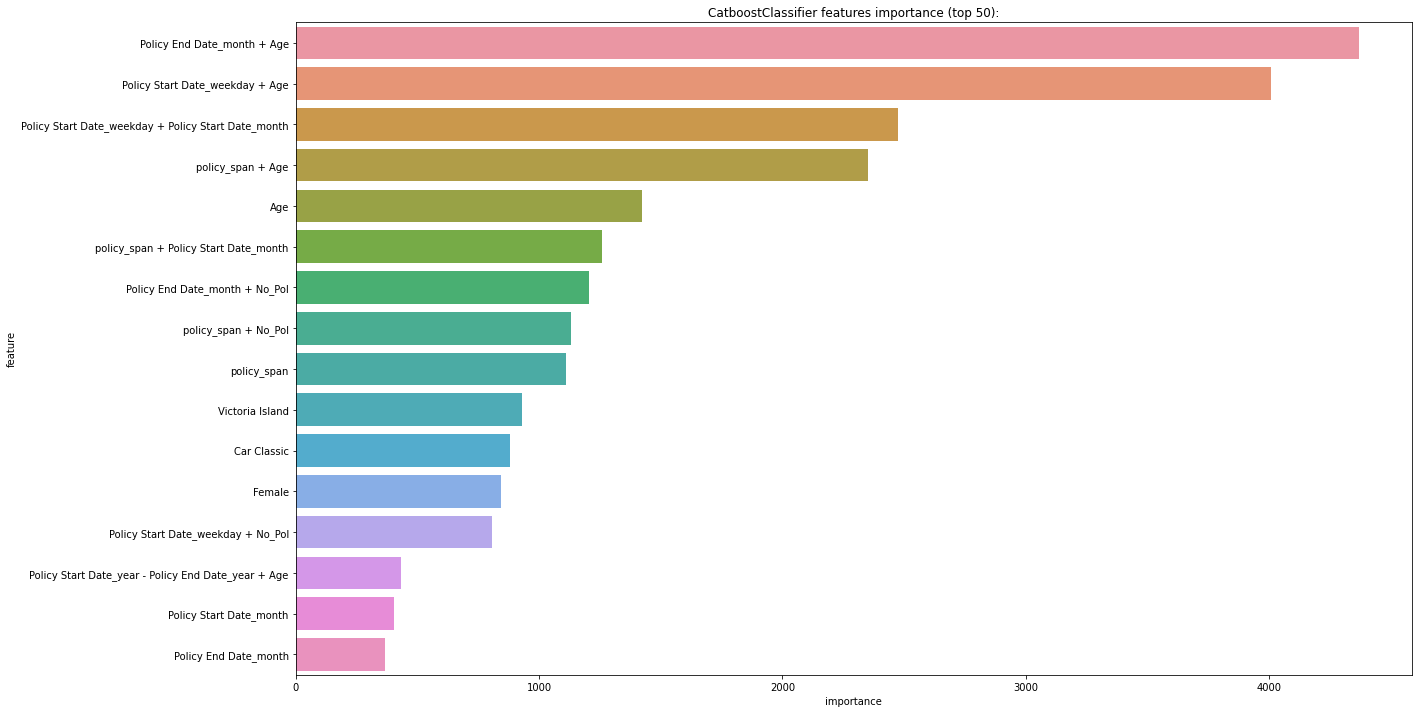

In [552]:
feature_importance_df = pd.DataFrame(classifier2.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X_train.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('CatboostClassifier features importance (top 50):');

In [548]:
# feature_importance_df['importance'].values
# feature_importance_df['feature'].values
# nothh = []
# for i in range(len(feature_importance_df['importance'].values)):
#   if feature_importance_df['importance'].values[i]<90:
#     nothh.append(feature_importance_df['feature'].values[i])

In [549]:
# coltodrop = [i for i in nothh]

In [553]:
preddddd = pd.DataFrame(predictions)
predddddtt = pd.DataFrame(predictionstestoo)

In [554]:
fff = preddddd.T
ttt = predddddtt.T

In [555]:
predictions = preddddd.mode()
predictionstestoo = predddddtt.mode()

In [556]:
predictionstestoo = predictionstestoo.T
predictions = predictions.T

In [557]:

predictions

,0,1
0,0.0,NaN
1,1.0,NaN
2,0.0,NaN
3,0.0,NaN
4,0.0,NaN
...,...,...
2411,0.0,NaN
2412,0.0,NaN
2413,0.0,NaN
2414,0.0,NaN


In [558]:
fsub = predictionstestoo[0]
sub = predictions[0]

In [559]:
from sklearn.metrics import f1_score
f1_score(y_val, sub)

0.3539823008849557

In [560]:
filesub['target'] = fsub

In [561]:
filesub.to_csv('finalsubboo.csv',index = False)

In [562]:
from google.colab import files
files.download('finalsubboo.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>